In [2]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [3]:
Pkg.add(["Plots","LinearAlgebra","Statistics","Distributions","Convex","SCS"])

    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
   Installed SCS_jll ─────────── v3.2.6+0
   Installed SCS ─────────────── v2.0.1
   Installed LDLFactorizations ─ v0.10.1
   Installed AMD ─────────────── v0.5.3
   Installed Convex ──────────── v0.16.3
    Updating `~/Documents/programming/BME-574-2024/Project.toml`
  [f65535da] + Convex v0.16.3
  [c946c3f1] + SCS v2.0.1
    Updating `~/Documents/programming/BME-574-2024/Manifest.toml`
  [14f7f29c] + AMD v0.5.3
  [f65535da] + Convex v0.16.3
  [40e66cde] + LDLFactorizations v0.10.1
  [c946c3f1] + SCS v2.0.1
⌅ [f4f2fc5b] + SCS_jll v3.2.6+0
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`
Precompiling project...
  ✓ AMD
  ✓ SCS_jll
  ✓ LDLFactorizations
  ✓ SCS
  ✓ Convex
  5 dependencies successfully 

In [4]:
using Plots, LinearAlgebra, Statistics, Distributions, Convex, SCS

In [5]:
nd = Normal(0,1)

Normal{Float64}(μ=0.0, σ=1.0)

In [6]:
n=500
m=100
A = rand(nd,n,m)

500×100 Matrix{Float64}:
  0.53315     1.44968   -0.696238   …  -0.281926    0.0369891   0.626593
  0.286712   -1.05921    1.29995       -2.2655     -0.79545     0.482994
  0.643671    1.45578   -0.935124      -1.98112    -1.08953     0.401456
  0.190539    1.04795    1.50593        0.0537801  -0.0216102   0.161953
  0.157691   -0.1059    -1.77843        0.309166    1.19843     0.930065
 -0.252025   -0.536931   0.606082   …   0.550199   -0.505496    0.979037
 -2.83813    -0.422642  -0.478467       1.12906     0.97413     0.235406
 -1.25126    -0.581021   0.54009       -0.580583   -0.660219    0.465307
 -1.61429    -0.553701   0.134567      -1.55886     2.13631     0.312667
  0.339937    0.814768   0.861736       0.0795698   0.0465944  -0.555318
 -0.309658    1.48906   -0.328703   …   1.11861     0.689399   -0.866095
 -1.04793    -0.514625  -0.104662      -1.08987    -0.494411    0.148714
  1.22681     2.12487   -0.319606       0.698795   -1.55712     0.492747
  ⋮                       

In [7]:
b = rand(nd,n)

500-element Vector{Float64}:
 -0.5167604841884759
 -0.8043900394288609
  0.26581056763709165
 -0.8676828921182804
 -0.5163898153556828
 -0.9922075969334166
  0.25271295270044714
  0.06181948241949255
 -1.7777103631040811
 -1.4713285269816099
  1.5292624332100204
 -0.6591506931934747
 -1.5821158236515818
  ⋮
 -1.0072702340022097
  0.33642159412086686
  0.39926745801141533
  0.6554680030599546
  0.6197580575175565
 -0.8660919610341531
  0.88996151362159
  0.3182130582609927
 -1.2760180211324321
 -0.9838182800024238
  0.7517080732192861
  1.5560928197108472

In [8]:
xdag = pinv(A)*b

100-element Vector{Float64}:
  0.07840106691152596
 -0.006548567920787044
  0.014840373964084184
 -0.06312570978553947
 -0.003584794254596917
  0.07670923622822716
 -0.051310507558587855
 -0.014647494674686123
 -0.0067682887341918045
  0.07735749761900541
 -0.01564856639603111
 -0.04698483402830264
  0.00837810872180995
  ⋮
 -0.000960877511447577
 -0.043069262392167615
 -0.031994149241903275
  0.0006919654057138967
 -0.23868727001983248
 -0.010043582693152702
  0.07185064641305842
  0.018103589573452938
 -0.021811852441953283
  0.0782382833517565
  0.05486493593169088
  0.020223277009988744

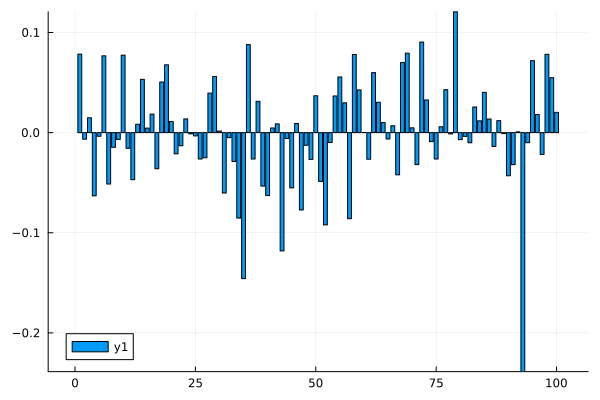

In [9]:
bar(xdag)

In [16]:
lam = [0.0, 0.1, 0.5]

3-element Vector{Float64}:
 0.0
 0.1
 0.5

In [10]:
x = Variable(m)

Variable
size: (100, 1)
sign: real
vexity: affine
id: 900…809

In [17]:
problem01 = minimize(norm(A*x - b,2) + 0.1*norm(x,1)) 

Problem statistics
  problem is DCP         : true
  number of variables    : 1 (100 scalar elements)
  number of constraints  : 0 (0 scalar elements)
  number of coefficients : 50_501
  number of atoms        : 7

Solution summary
  termination status : OPTIMIZE_NOT_CALLED
  primal status      : NO_SOLUTION
  dual status        : NO_SOLUTION

Expression graph
  minimize
   └─ + (convex; positive)
      ├─ norm2 (convex; positive)
      │  └─ + (affine; real)
      │     ├─ …
      │     └─ …
      └─ * (convex; positive)
         ├─ [0.1;;]
         └─ sum (convex; positive)
            └─ …


In [18]:
solve!(problem01, SCS.Optimizer; silent = true)

Problem statistics
  problem is DCP         : true
  number of variables    : 1 (100 scalar elements)
  number of constraints  : 0 (0 scalar elements)
  number of coefficients : 50_501
  number of atoms        : 7

Solution summary
  termination status : OPTIMAL
  primal status      : FEASIBLE_POINT
  dual status        : FEASIBLE_POINT
  objective value    : 20.146

Expression graph
  minimize
   └─ + (convex; positive)
      ├─ norm2 (convex; positive)
      │  └─ + (affine; real)
      │     ├─ …
      │     └─ …
      └─ * (convex; positive)
         ├─ [0.1;;]
         └─ sum (convex; positive)
            └─ …


In [14]:
x01 = vec(evaluate(x))

100-element Vector{Float64}:
  0.0720586753795211
 -0.0008246185007909414
  0.01306835756553154
 -0.05528136901107069
 -0.0016023227124329644
  0.06643865513873586
 -0.04663626332472405
 -0.009972482200050781
 -0.004993995520296404
  0.06872815248731515
 -0.009226076308880766
 -0.037467757448802964
  0.0020226286527496155
  ⋮
  0.0009895753128439948
 -0.036205565967465075
 -0.028875688937406992
 -0.00016956449453919923
 -0.23212876835827803
 -0.0050364107791847825
  0.06446558639443725
  0.010013106681289578
 -0.01290721164288914
  0.06977159603339578
  0.05199249430941353
  0.015577534730862068

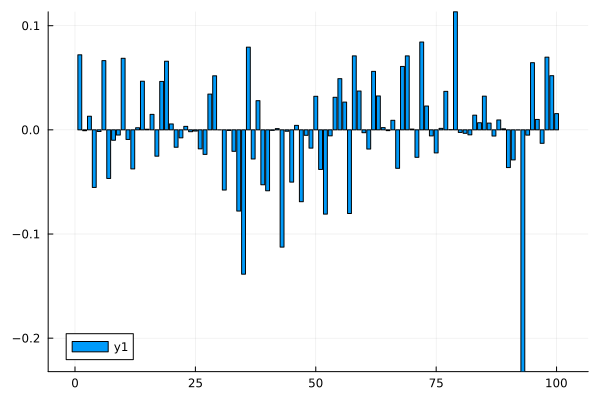

In [16]:
bar(x01)

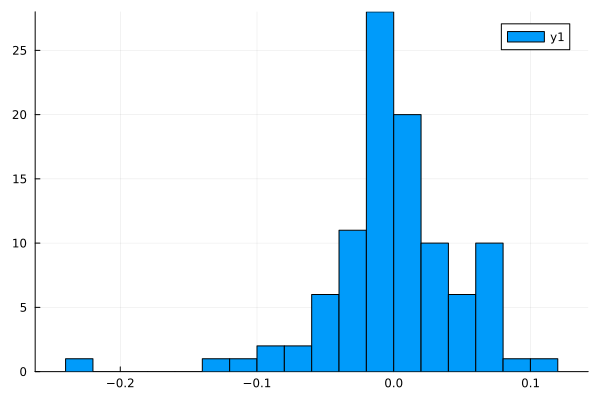

In [23]:
histogram(x01)

In [19]:
problem05 = minimize(norm(A*x - b,2) + 0.5*norm(x,1)) 

Problem statistics
  problem is DCP         : true
  number of variables    : 1 (100 scalar elements)
  number of constraints  : 0 (0 scalar elements)
  number of coefficients : 50_501
  number of atoms        : 7

Solution summary
  termination status : OPTIMIZE_NOT_CALLED
  primal status      : NO_SOLUTION
  dual status        : NO_SOLUTION

Expression graph
  minimize
   └─ + (convex; positive)
      ├─ norm2 (convex; positive)
      │  └─ + (affine; real)
      │     ├─ …
      │     └─ …
      └─ * (convex; positive)
         ├─ [0.5;;]
         └─ sum (convex; positive)
            └─ …


In [20]:
solve!(problem05, SCS.Optimizer; silent = true)

Problem statistics
  problem is DCP         : true
  number of variables    : 1 (100 scalar elements)
  number of constraints  : 0 (0 scalar elements)
  number of coefficients : 50_501
  number of atoms        : 7

Solution summary
  termination status : OPTIMAL
  primal status      : FEASIBLE_POINT
  dual status        : FEASIBLE_POINT
  objective value    : 21.1282

Expression graph
  minimize
   └─ + (convex; positive)
      ├─ norm2 (convex; positive)
      │  └─ + (affine; real)
      │     ├─ …
      │     └─ …
      └─ * (convex; positive)
         ├─ [0.5;;]
         └─ sum (convex; positive)
            └─ …


In [21]:
x05 = vec(evaluate(x))

100-element Vector{Float64}:
  0.05344486956969621
 -6.0129520588399916e-5
  0.005900486085453045
 -0.029129415896864738
 -0.0007190839745460249
  0.03094245687021921
 -0.023546883626804026
 -0.0006731105065020737
 -0.0015931540562367317
  0.037111846502485384
 -0.00022419917481007084
 -0.008301087929391908
 -0.0004386705602291109
  ⋮
  0.0006904729691737067
 -0.014032362276171837
 -0.007827535044044447
  6.633815055420996e-5
 -0.21151938492568131
 -0.0007283184913310372
  0.03832065562450961
  0.00016434727546473736
 -0.001033203907253823
  0.03906542146966508
  0.04043986936419606
  0.0011278984621930185

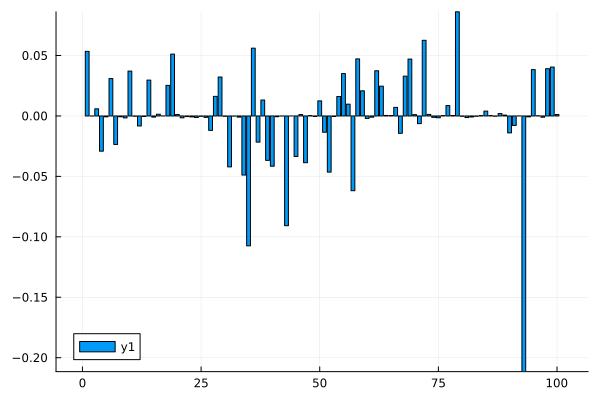

In [22]:
bar(x05)

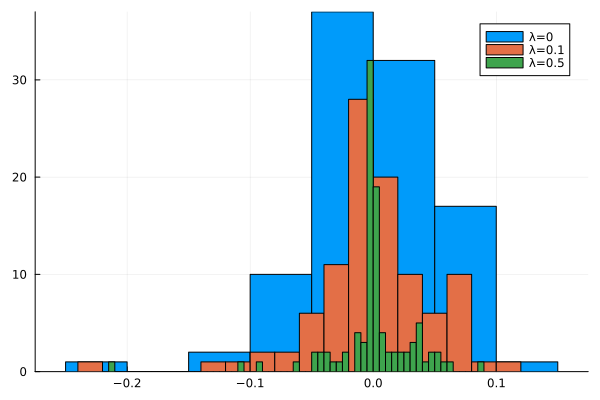

In [32]:
histogram(xdag, label="λ=0")
histogram!(x01, label="λ=0.1")
histogram!(x05, label="λ=0.5")